# Optimización de Hyper-parámetros

Prácticamente todos los algoritmos de aprendizaje automático tienen una serie de parámetros que regulan la forma en la cual son entrenados. Por convención, los mismos son llamados hyper-parámetros, para diferenciarlos de los que el modelo aprende como función de los datos de entrenamiento.  

En líneas generales, el modelado de un problema predictivo puede separase en tres etapas:

1. Determinación del Modelo y del algoritmo de entrenamiento
2. Determinación de los hyper-parámetros del algoritmo / modelo
3. Determinación de los parámetros del modelo

Si bien "algoritmo de aprendizaje" y "modelo" suelen usarse con el mismo significado, por su estrecha relación, en términos rigurosos, son dos conceptos separados. El modelo es una abstracción matemática de la realidad mientras que el algoritmo es la receta para encontrar los parámetros del modelo. Por ejemplo, un modelo es la regresión logística, sobre el cual existen una cantidad de algoritmos de entrenamiento que, en esencia, son distintos métodos numéricos de optimización de funciones. 

Una vez seleccionados modelo y algoritmo, se deben determinar ciertos hyper-parámetros. Algunos de ellos son propios del modelo y otros de algoritmo de aprendizaje. Por ejemplo, la profundidad máxima de un árbol de decisión es un hyper-parámetro del modelo, mientras que la función de pérdida (gini o entropía) corresponde al algoritmo. 

Finalmente, los parámetros del modelo son justamente los que determina el algoritmo de entrenamiento.


### Métodos de optimización

Existen esencialmente tres formas de encarar la optimización de hyper-parámetros

1. búsqueda exhaustiva (gridsearch)
2. búsqueda aleatoria (random search)
3. otros métodos más "inteligentes" (por ejemplo, optimización bayesiana)

La búsqueda exhaustiva consiste en explorar los más posible el espacio de hyper-parámetros para encontrar el óptimo, se lo puede ver como un método de fuerza bruta. Sólo es viable si cada evaluación funcional es "barata", computacionalmente hablando. 

La búsqueda aleatoria, consiste en tomar muestras al azar del espacio de hp, teniendo la expectativa de que se puede llegar a un valor lo suficientemente cercano al óptimo sin tener que explorar el espacio completo. Este método pretende llegar a un resultado similar al anterior, pero con muchas menos evaluaciones funcionales. Una de las lecturas del teorema de "no free lunch" implica que, si tomamos todos los posibles problemas de optimización, en promedio, ningún método encontrará el óptimo más rápido que la búsqueda al azar. O, dicho de otra manera, no existe ningún algoritmo de búsqueda más eficiente que la búsqueda al azar para todos los posibles problemas de optimización. 

Los demás métodos "inteligentes" pretenden encontrar el óptimo más rápidamente pero, de acuerdo con el teorema de no free lunch, son realmente más rápidos en un subconjunto de los problemas.


In [2]:
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
sns.set()

C:\Users\Rafael\Documents\python\current\python-3.6.5.amd64\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.5.amd64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#setup para el notebook

%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [4]:
data = pd.read_csv("../data/titanic_proc.csv", index_col="PassengerId")

X = data.drop("Survived", axis=1)
y = data["Survived"]

#### Busqueda exhaustiva

In [5]:
folds = [[tr, te] for tr, te in StratifiedKFold(3, random_state=12345).split(X, y)]
def sample_loss(params):
    C = 10 ** params[0]
    gamma = 10 ** params[1]
    print("*"*10)
    print("haciendo", C, gamma)
    res = cross_val_score(SVC(C=C, gamma=gamma, random_state=12345),
                           X=X, y=y, scoring='roc_auc', cv=folds).mean()
    print("el resultado fue", res)
    return res

In [6]:
lambdas = np.linspace(5, -4, 20)
gammas = np.linspace(1, -7, 20)

In [7]:
# tomamos el producto cartesiano entre los dos arrays de parametros
param_grid = np.array([[C, gamma] for gamma in gammas for C in lambdas])

real_loss = [sample_loss(params) for params in param_grid]

# el máximo está en:
optima = param_grid[np.array(real_loss).argmax(), :]
optima

**********
haciendo 100000.0 10.0
el resultado fue 0.536709487745
**********
haciendo 33598.1828628 10.0
el resultado fue 0.536709487745
**********
haciendo 11288.3789168 10.0
el resultado fue 0.536709487745
**********
haciendo 3792.69019073 10.0
el resultado fue 0.536709487745
**********
haciendo 1274.2749857 10.0
el resultado fue 0.536709487745
**********
haciendo 428.133239872 10.0
el resultado fue 0.536709487745
**********
haciendo 143.844988829 10.0
el resultado fue 0.536709487745
**********
haciendo 48.3293023857 10.0
el resultado fue 0.536709487745
**********
haciendo 16.2377673919 10.0
el resultado fue 0.536709487745
**********
haciendo 5.45559478117 10.0
el resultado fue 0.536709487745
**********
haciendo 1.83298071083 10.0
el resultado fue 0.536709487745
**********
haciendo 0.615848211066 10.0
el resultado fue 0.5375563225
**********
haciendo 0.206913808111 10.0
el resultado fue 0.537580289522
**********
haciendo 0.0695192796178 10.0
el resultado fue 0.537572300514
**********

el resultado fue 0.580736906017
**********
haciendo 143.844988829 0.0784759970351
el resultado fue 0.580736906017
**********
haciendo 48.3293023857 0.0784759970351
el resultado fue 0.580736906017
**********
haciendo 16.2377673919 0.0784759970351
el resultado fue 0.580736906017
**********
haciendo 5.45559478117 0.0784759970351
el resultado fue 0.580752884032
**********
haciendo 1.83298071083 0.0784759970351
el resultado fue 0.582079059215
**********
haciendo 0.615848211066 0.0784759970351
el resultado fue 0.584435816317
**********
haciendo 0.206913808111 0.0784759970351
el resultado fue 0.584995046816
**********
haciendo 0.0695192796178 0.0784759970351
el resultado fue 0.584699453552
**********
haciendo 0.0233572146909 0.0784759970351
el resultado fue 0.585530310293
**********
haciendo 0.00784759970351 0.0784759970351
el resultado fue 0.584763365609
**********
haciendo 0.00263665089873 0.0784759970351
el resultado fue 0.584979068801
**********
haciendo 0.00088586679041 0.0784759970351
e

el resultado fue 0.60408078484
**********
haciendo 143.844988829 0.000615848211066
el resultado fue 0.57886747835
**********
haciendo 48.3293023857 0.000615848211066
el resultado fue 0.581392004602
**********
haciendo 16.2377673919 0.000615848211066
el resultado fue 0.590787076982
**********
haciendo 5.45559478117 0.000615848211066
el resultado fue 0.597961205381
**********
haciendo 1.83298071083 0.000615848211066
el resultado fue 0.598089029495
**********
haciendo 0.615848211066 0.000615848211066
el resultado fue 0.603521554341
**********
haciendo 0.206913808111 0.000615848211066
el resultado fue 0.5959639536
**********
haciendo 0.0695192796178 0.000615848211066
el resultado fue 0.595676349343
**********
haciendo 0.0233572146909 0.000615848211066
el resultado fue 0.5957402614
**********
haciendo 0.00784759970351 0.000615848211066
el resultado fue 0.596443294027
**********
haciendo 0.00263665089873 0.000615848211066
el resultado fue 0.595197008916
**********
haciendo 0.00088586679041 0

el resultado fue 0.800530470073
**********
haciendo 1274.2749857 4.83293023857e-06
el resultado fue 0.77173808839
**********
haciendo 428.133239872 4.83293023857e-06
el resultado fue 0.75047135142
**********
haciendo 143.844988829 4.83293023857e-06
el resultado fue 0.737065797463
**********
haciendo 48.3293023857 4.83293023857e-06
el resultado fue 0.73168120666
**********
haciendo 16.2377673919 4.83293023857e-06
el resultado fue 0.720320838526
**********
haciendo 5.45559478117 4.83293023857e-06
el resultado fue 0.71424919311
**********
haciendo 1.83298071083 4.83293023857e-06
el resultado fue 0.710542293804
**********
haciendo 0.615848211066 4.83293023857e-06
el resultado fue 0.707969833509
**********
haciendo 0.206913808111 4.83293023857e-06
el resultado fue 0.703975329946
**********
haciendo 0.0695192796178 4.83293023857e-06
el resultado fue 0.704806186687
**********
haciendo 0.0233572146909 4.83293023857e-06
el resultado fue 0.705061834915
**********
haciendo 0.00784759970351 4.8329

array([ 5.        , -6.57894737])

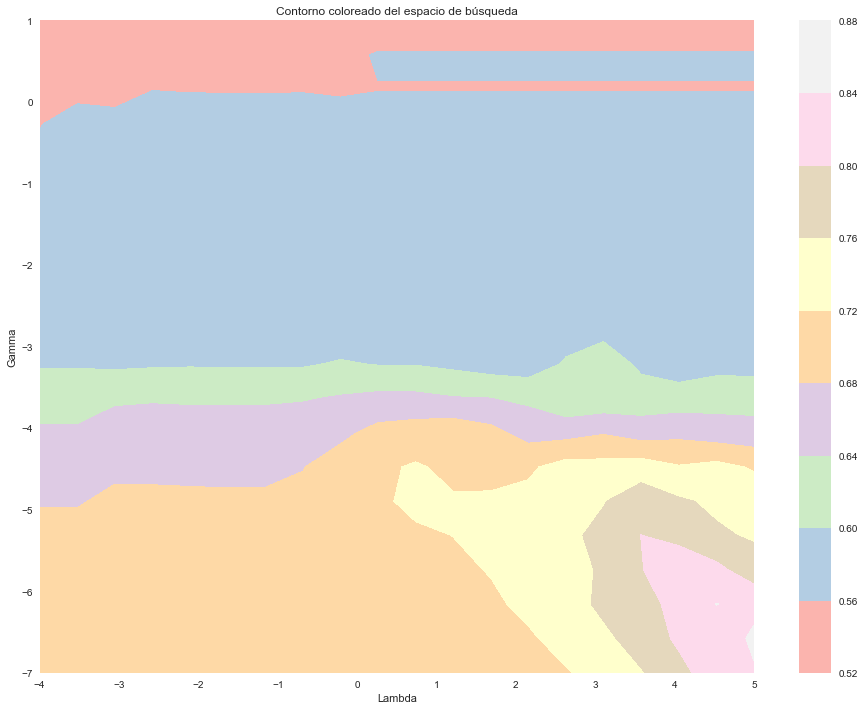

In [8]:
C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap=plt.cm.Pastel1)
plt.colorbar(cp)
plt.title('Contorno coloreado del espacio de búsqueda')
plt.xlabel('Lambda')
plt.ylabel('Gamma')
plt.show()

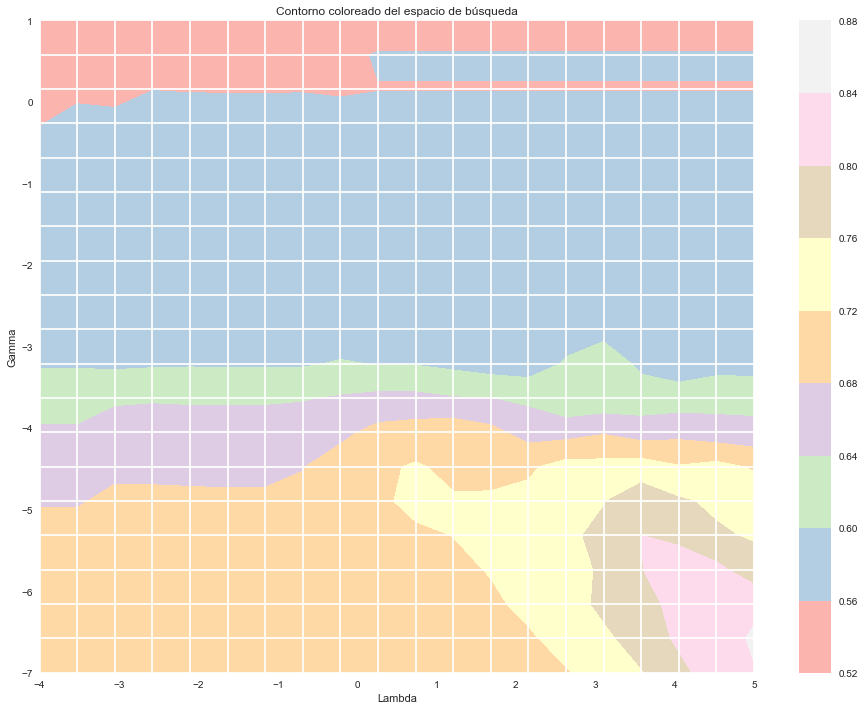

In [9]:
C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap=plt.cm.Pastel1)
plt.colorbar(cp)
plt.title('Contorno coloreado del espacio de búsqueda')
plt.xlabel('Lambda')
plt.ylabel('Gamma')
plt.vlines(lambdas, gammas.min(), gammas.max(), color="white")
plt.hlines(gammas, lambdas.min(), lambdas.max(), color="white")
plt.show()

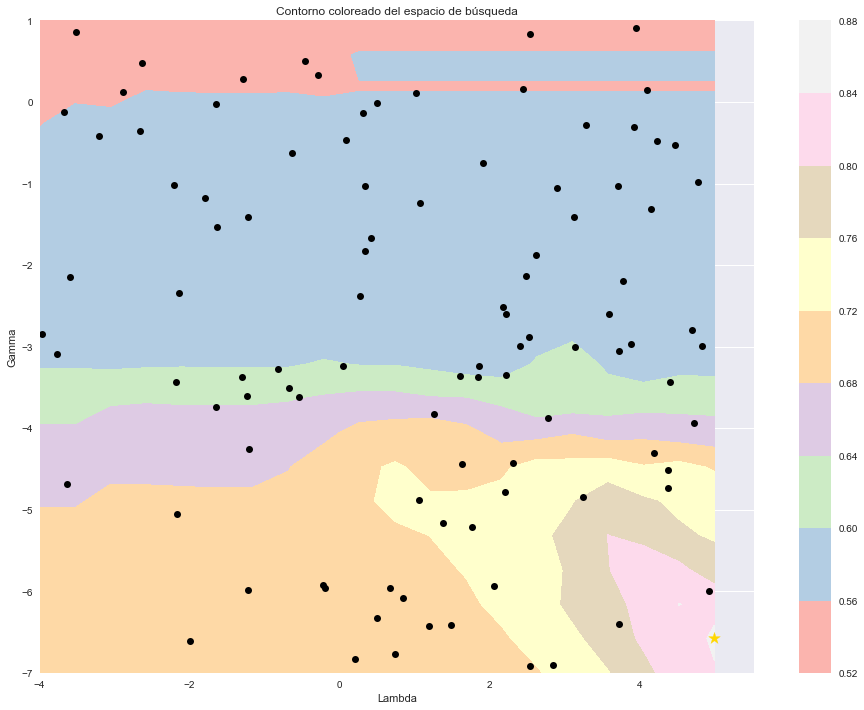

In [10]:
#búsqueda aleatoria

C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap=plt.cm.Pastel1)
plt.colorbar(cp)
plt.title('Contorno coloreado del espacio de búsqueda')
plt.xlabel('Lambda')
plt.ylabel('Gamma')
for p in range(100):
    px = np.random.uniform(lambdas.min(), lambdas.max())
    py = np.random.uniform(gammas.min(), gammas.max())
    plt.plot(px, py, marker='o', color='black')
plt.scatter(optima[0], optima[1], marker='*', c='gold', s=150)
plt.show()

### Métodos más inteligentes

#### Optimización Bayesiana

La optimización bayesiana es una implementación orientada a hyper-parámetros de un método llamado optimización secuencial basada en modelos. Estos algoritmos usan evaluaciones funcionales previas para determinar el próximo (óptimo) punto a evaluar. A grandes rasgos, el algoritmo hace lo siguiente:

1. tomando las evaluaciones previas, determina una distribución a posteriori de la función objetivo.
2. determina el nuevo punto a evaluar que, en función de la distribución alcanzada en el punto anterior, maximiza una determinada función de utilidad. 

Estos pasos continúan hasta que se satisface algún criterio de convergencia. 

Para determinar la distribución de la función objetivo, es necesario contar con un modelo de verosimilitud y una distribución a priori. El modelo bayesiano, presume una distribución normal con ruido tal que:


$$y(x)= f(x) + e$$
$$e \sim \mathcal{N}(0,\,\sigma^{2})$$

Puesto de otra manera 

$$ y(x) \sim \mathcal{N}(f(x),\, \sigma^{2})$$

Para la distribución a priori de la función de pérdida, se usa un proceso gaussiano. En términos simples y para este contexto, un proceso gaussiano es similar a una distribución normal, pero en lugar de darnos un valor de probabilidad, nos da una distribución normal con media y varianza que describe la conocimiento que tenemos hasta el momento respecto de un determinado punto en el espacio de búsqueda. 

##### Función de Adquisición

Para encontrar en siguiente punto a probar, necesitamos una función de utilidad que nos diga cuál es el punto más prometedor. Hay múltiples funciones de utilidad, pero en general se usa una llamada "mejora esperada" (expected improvemente). 

$$ EI(x) = \mathbb{E}[max(\{0, f(x) - f(x^{*})\}]$$


$$ 
\begin{array}{@{} r @{} c @{} l @{} }
&EI(x) &{}=\displaystyle
\begin{cases}
(\mu(x)-f(x^{*})) * \Phi(Z) + \sigma(x) * \phi(Z) &\text{if } \sigma(x) > 0,\\
0 &\text{if } \sigma(x) = 0.
\end{cases}
\end{array}
$$

donde:
$$x^{*}: \text{es el valor optimo actual}$$
$$\Phi(Z): \text{normal acumulada}$$
$$\phi(Z): \text{densidad normal}$$
$$Z = \frac{\mu(x) - f(x^{*})}{\sigma(x)}$$

Vemos entonces que EI va a tender a ser grande cuando:

1. la media de la distribución en ese punto sea grande
2. la dispersión (incertidumbre) en ese punto sea alta

El algoritmo de optimización queda entonces:

1. Con cada nueva evaluación funcional, actualizar la distribución a posteriori de f.
2. Encontrar el nuevo x* que maximiza el EI.
3. Calcular la perdida f en el punto x*
4. repetir hasta convergencia (EI = 0 para todo nuevo valor) o alcanzar número máximo de iteraciones


In [11]:
from gp import bayesian_optimisation

bounds = np.array([[-4, 5], [-7, 1]])

xp, yp = bayesian_optimisation(n_iters=30, 
                               sample_loss=sample_loss, 
                               bounds=bounds,
                               n_pre_samples=3,
                               random_search=100000)

**********
haciendo 176.85970677 9.3430128065
el resultado fue 0.537284696258
**********
haciendo 0.0109306006906 0.0234299711929
el resultado fue 0.600014380213
**********
haciendo 30.2824281779 0.0222029721465
el resultado fue 0.585873837599
**********
haciendo 0.000102264357461 1.01664928334e-07
el resultado fue 0.703511967533
**********
haciendo 0.000104318566263 1.02584578812e-07
el resultado fue 0.694516345509
**********
haciendo 93655.2886369 1.00446745923e-07
el resultado fue 0.841386252517
**********
haciendo 99458.0773011 1.040001108e-07
el resultado fue 0.839277154635
**********
haciendo 99237.546874 1.02484640489e-07
el resultado fue 0.837695331224
**********
haciendo 2560.24194669 1.00013133657e-07
el resultado fue 0.747787045026
**********
haciendo 99766.0927124 1.98610983946e-06
el resultado fue 0.777570063592
**********
haciendo 90817.0857359 1.01656528428e-07
el resultado fue 0.841482120602
**********
haciendo 99398.1157576 1.06743659593e-07
el resultado fue 0.83914933

C:\Users\Rafael\Documents\python\current\python-3.6.5.amd64\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  3.09282167e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


**********
haciendo 99587.4746477 1.03575150107e-07
el resultado fue 0.840651263861
**********
haciendo 98625.9033443 1.04193346866e-07
el resultado fue 0.837072188668
**********
haciendo 99695.3421425 0.0393340256512
el resultado fue 0.582246828364
**********
haciendo 93365.512112 1.00004457753e-07
el resultado fue 0.841242450388
**********
haciendo 0.157927770916 1.00082580792e-07
el resultado fue 0.701131243409
**********
haciendo 95949.2470462 1.06322885334e-07
el resultado fue 0.84023583549
**********
haciendo 96511.1652599 1.00241126706e-07
el resultado fue 0.83993225322
**********
haciendo 98686.6946486 1.00840665158e-07
el resultado fue 0.840555395775
**********
haciendo 96888.7214635 1.05584449353e-07
el resultado fue 0.841466142588
**********
haciendo 94423.3798785 1.00632838155e-07
el resultado fue 0.840747131946
**********
haciendo 97575.4416641 1.02487336113e-07
el resultado fue 0.839500846835
**********
haciendo 96724.1933976 1.01419351524e-07
el resultado fue 0.838669990

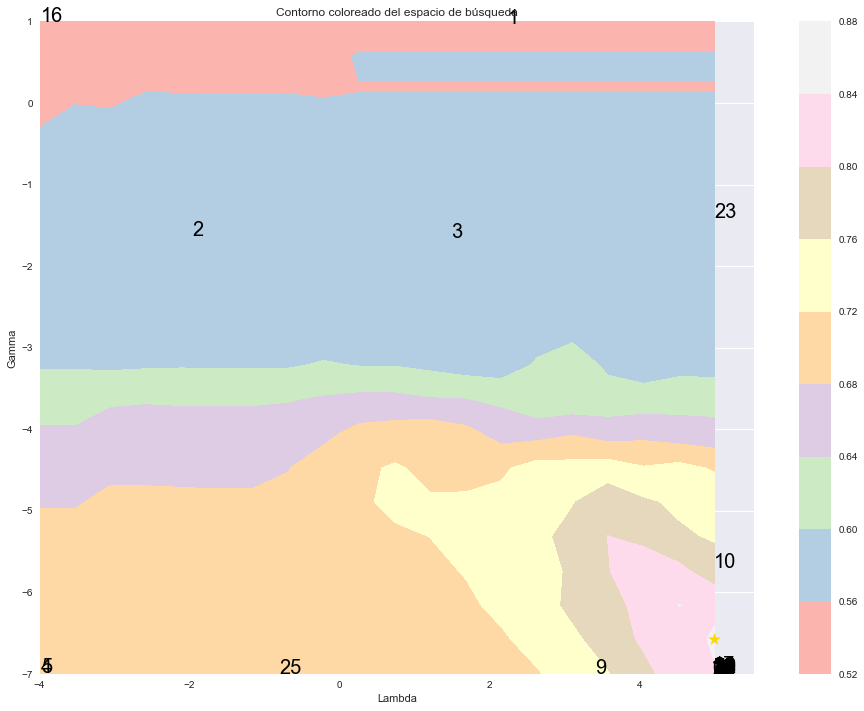

In [12]:
C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap=plt.cm.Pastel1)
plt.colorbar(cp)
plt.title('Contorno coloreado del espacio de búsqueda')
plt.xlabel('Lambda')
plt.ylabel('Gamma')
for i, ((px, py), score) in enumerate(zip(xp, yp)):
    plt.text(px, py, str(i + 1), color="black", fontsize=20)
plt.scatter(optima[0], optima[1], marker='*', c='gold', s=150)
plt.show()

In [13]:
### exploration vs exploitation

In [14]:
optima

array([ 5.        , -6.57894737])

In [15]:
def sample_loss(Ci, gammai):
    try:
        C = 10 ** Ci[0]
    except: 
        C = 10 ** Ci
    gamma = 10 ** gammai
    print("*"*10)
    print("haciendo", C, gamma)
    res = cross_val_score(SVC(C=C, gamma=gamma, random_state=12345),
                           X=X, y=y, scoring='roc_auc', cv=folds, n_jobs=-1).mean()
    print("el resultado fue", res)
    return res

In [16]:
import sklearn.gaussian_process as gp

from scipy.stats import norm
from scipy.optimize import minimize


In [17]:
def expected_improvement(x, gaussian_process, evaluated_loss, greater_is_better=False, n_params=1):
    """ expected_improvement
    Expected improvement acquisition function.
    Arguments:
    ----------
        x: array-like, shape = [n_samples, n_hyperparams]
            The point for which the expected improvement needs to be computed.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: Numpy array.
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        n_params: int.
            Dimension of the hyperparameter space.
    """

    x_to_predict = x.reshape(-1, n_params)

    mu, sigma = gaussian_process.predict(x_to_predict, return_std=True)

    if greater_is_better:
        loss_optimum = np.max(evaluated_loss)
    else:
        loss_optimum = np.min(evaluated_loss)

    scaling_factor = (-1) ** (not greater_is_better)

    # In case sigma equals zero
    with np.errstate(divide='ignore'):
        Z = scaling_factor * (mu - loss_optimum) / sigma
        expected_improvement = scaling_factor * (mu - loss_optimum) * norm.cdf(Z) + sigma * norm.pdf(Z)
        expected_improvement[sigma == 0.0] == 0.0

    return -1 * expected_improvement


In [18]:
def sample_next_hyperparameter(acquisition_func, gaussian_process, evaluated_loss, greater_is_better=False,
                               bounds=(0, 10), n_restarts=25):
    """ sample_next_hyperparameter
    Proposes the next hyperparameter to sample the loss function for.
    Arguments:
    ----------
        acquisition_func: function.
            Acquisition function to optimise.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: array-like, shape = [n_obs,]
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        bounds: Tuple.
            Bounds for the L-BFGS optimiser.
        n_restarts: integer.
            Number of times to run the minimiser with different starting points.
    """
    best_x = None
    best_acquisition_value = 1
    n_params = bounds.shape[0]

    for starting_point in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, n_params)):

        res = minimize(fun=acquisition_func,
                       x0=starting_point.reshape(1, -1),
                       bounds=bounds,
                       method='L-BFGS-B',
                       args=(gaussian_process, evaluated_loss, greater_is_better, n_params))

        if res.fun < best_acquisition_value:
            best_acquisition_value = res.fun
            best_x = res.x

    return best_x

In [19]:
def bo(n_iters, sample_loss, xp, yp, bounds):
    kernel = gp.kernels.Matern()
    model = gp.GaussianProcessRegressor(kernel=kernel,
                                        alpha=1e-4,
                                        n_restarts_optimizer=10,
                                        normalize_y=True)
    
    for i in range(n_iters):
        # actualizar modelo de la función de pérdida
        x = np.asarray(xp)
        x = x[:, None]
        model.fit(x, yp)

        yield xp, yp, model
        # encontrar el nuevo valor a evaluar
        next_sample = sample_next_hyperparameter(expected_improvement, model, yp, greater_is_better=True, 
                                                 bounds=bounds, n_restarts=100)

        # evaluar el nuevo valor
        next_loss = sample_loss(next_sample, -6.6)
        
        xp.append(next_sample[0])
        yp.append(next_loss)


In [20]:
bounds = np.asarray([[-4, 10]])

gamma = -6.6
xp = list(np.random.uniform(bounds[0, 0], bounds[0, 1], 3))
yp = [sample_loss(C, gamma) for C in xp]

lambdas  = np.linspace(bounds[0, 0], bounds[0, 1], 20)
real_loss = [sample_loss(params, gamma) for params in lambdas]

**********
haciendo 0.022476840289 2.5118864315095823e-07
el resultado fue 0.699741156169
**********
haciendo 128238245.094 2.5118864315095823e-07
el resultado fue 0.817371297095
**********
haciendo 0.0569324343675 2.5118864315095823e-07
el resultado fue 0.700715815039
**********
haciendo 0.0001 2.5118864315095823e-07
el resultado fue 0.695427092321
**********
haciendo 0.000545559478117 2.5118864315095823e-07
el resultado fue 0.695427092321
**********
haciendo 0.00297635144163 2.5118864315095823e-07
el resultado fue 0.695427092321
**********
haciendo 0.0162377673919 2.5118864315095823e-07
el resultado fue 0.699277793756
**********
haciendo 0.088586679041 2.5118864315095823e-07
el resultado fue 0.701626561851
**********
haciendo 0.483293023857 2.5118864315095823e-07
el resultado fue 0.701690473908
**********
haciendo 2.63665089873 2.5118864315095823e-07
el resultado fue 0.702217748378
**********
haciendo 14.3844988829 2.5118864315095823e-07
el resultado fue 0.705013900872
**********
hac

In [21]:
def plot_proc(xp, yp, lambdas, real_loss, model):
    x_render = {k: v for k, v in zip(lambdas, real_loss)}
    x_render.update({k: v for k, v in zip(xp, yp)})
    y_render = [x_render[k] for k in sorted(x_render.keys())]
    x_render = list(sorted(x_render.keys()))
    fig, ax1 = plt.subplots()
    ax1.set_title('AUC por lambda')
    ax1.set_xlabel('Lambda')
    ax1.set_ylabel('AUC')
    ax1.plot(lambdas, real_loss, 'r:', label=u'real loss')
    ax1.plot(xp, yp, 'r.', markersize=10, label=u'Observations')
    exp_loss, sigma = [], []
    exp_improv = -1 * expected_improvement(lambdas, model, yp, greater_is_better=True, n_params=1)
    for x in x_render:
        proc_loss, std = model.predict(x, return_std=True)
        exp_loss.append(proc_loss[0])
        sigma.append(std[0])

    exp_loss = np.asarray(exp_loss)
    sigma = np.asarray(sigma)
    plt.fill_between(x_render, exp_loss - 1.9600 * sigma, exp_loss + 1.9600 * sigma,
                     alpha=.5, label='95% confidence interval')
    plt.plot(x_render, exp_loss, 'b-', label=u'Prediction')
    plt.legend(loc='upper left')
    ax2 = ax1.twinx()
    ax2.plot(lambdas, exp_improv, 'black', label=u'Expected Improvement')
    ax2.set_ylabel('Expected Improvement')
    plt.show()

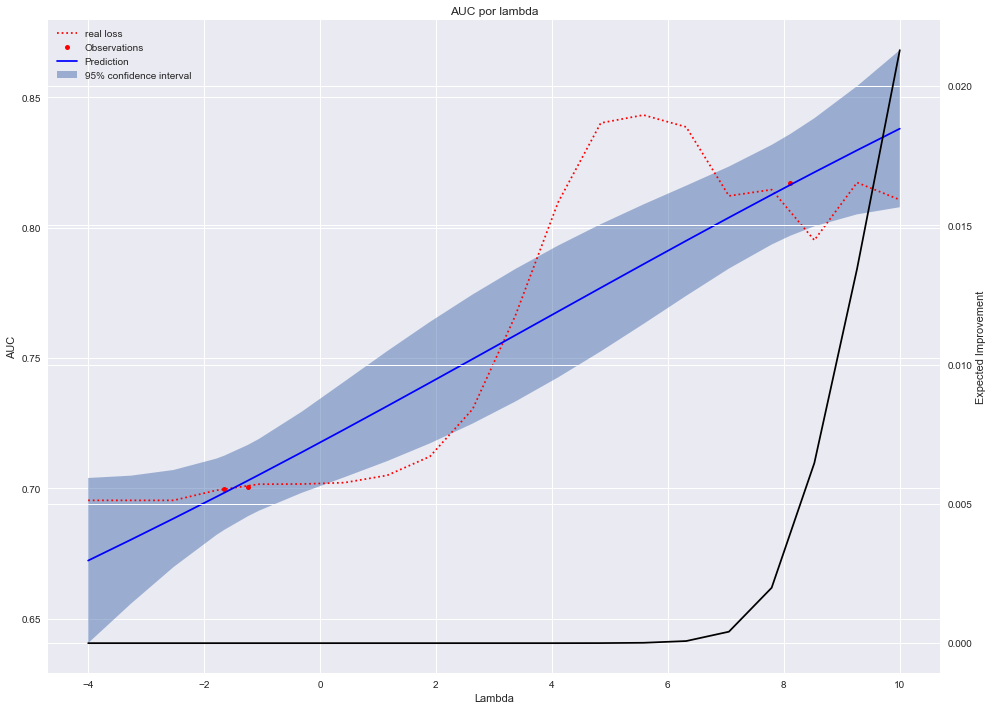

In [22]:
opti = bo(100, sample_loss, xp, yp, bounds)
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 10000000000.0 2.5118864315095823e-07
el resultado fue 0.81074042118


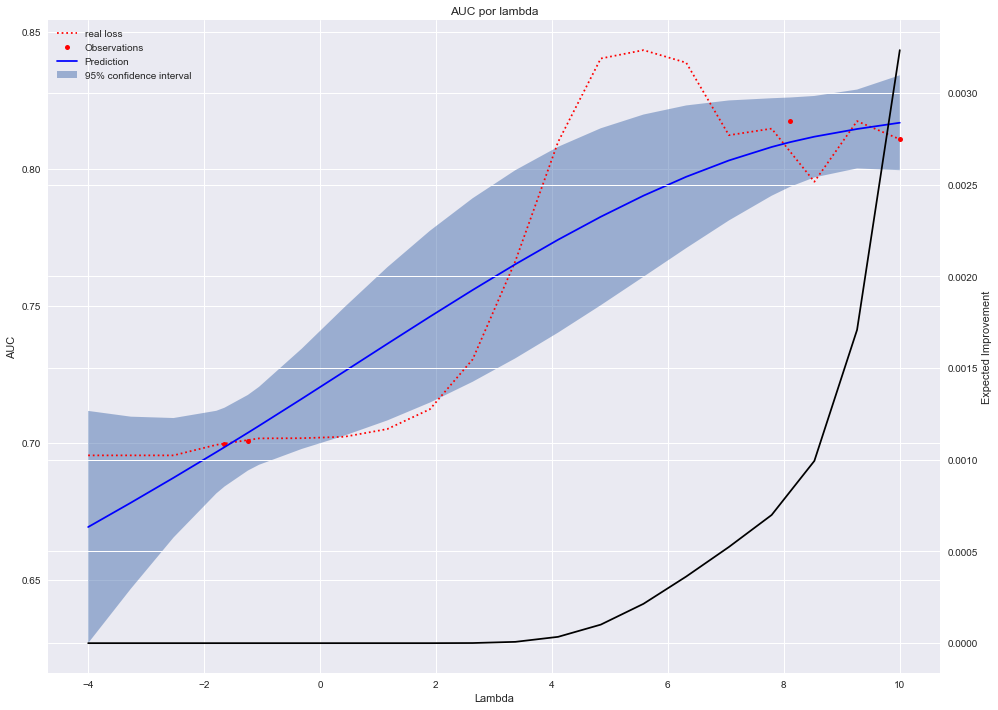

In [23]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 10000000000.0 2.5118864315095823e-07
el resultado fue 0.81074042118


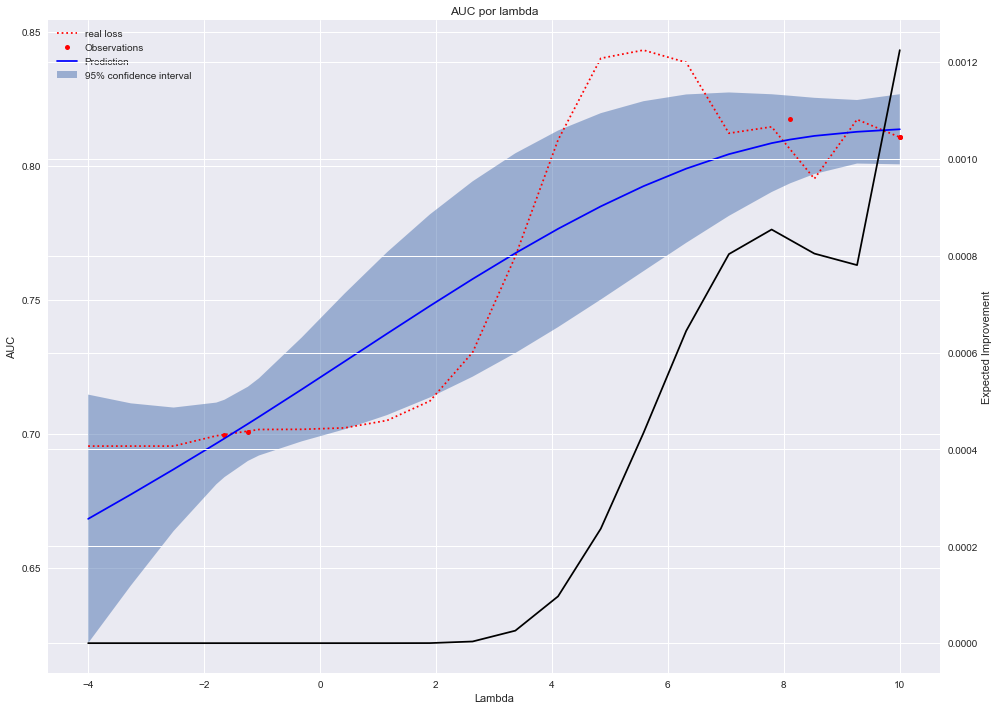

In [24]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 10000000000.0 2.5118864315095823e-07
el resultado fue 0.81074042118


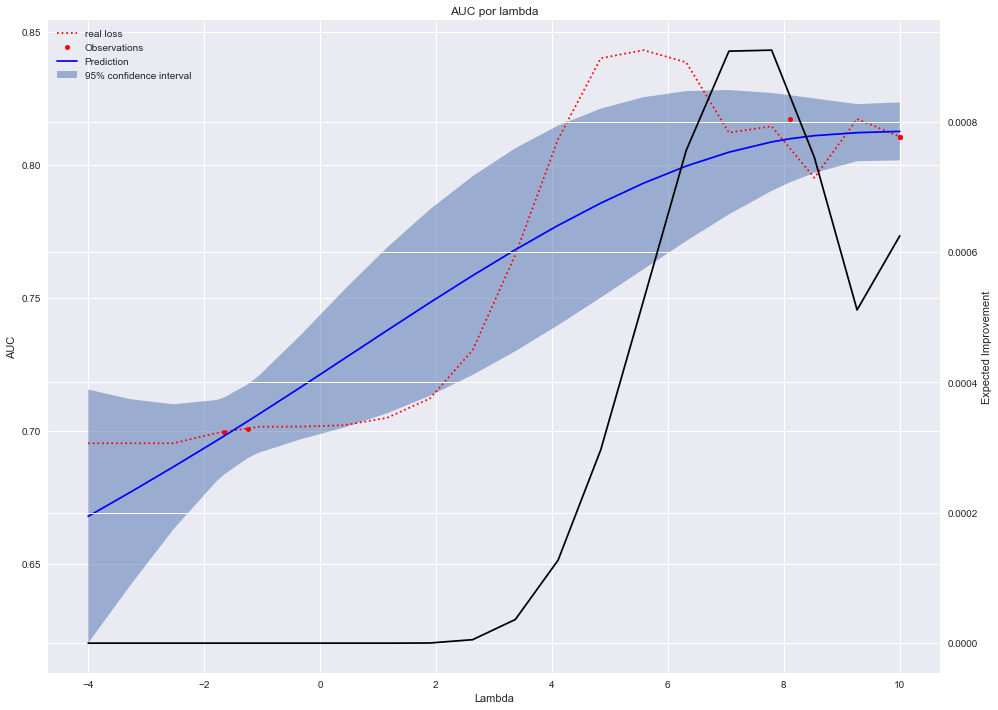

In [25]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 22925155.8673 2.5118864315095823e-07
el resultado fue 0.807704598473


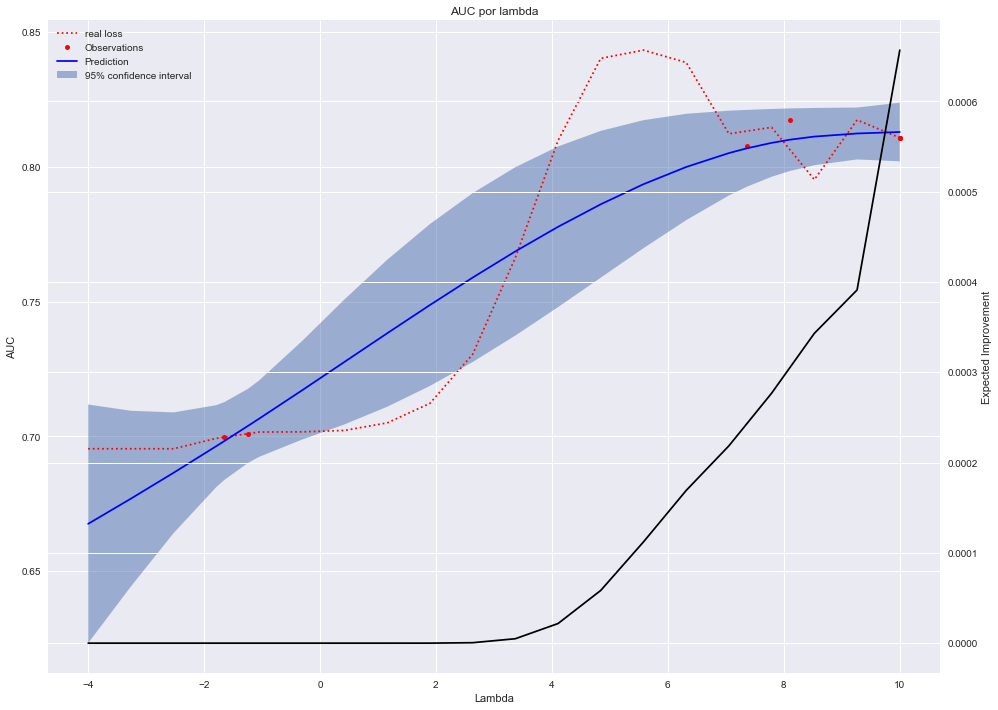

In [26]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 10000000000.0 2.5118864315095823e-07
el resultado fue 0.81074042118


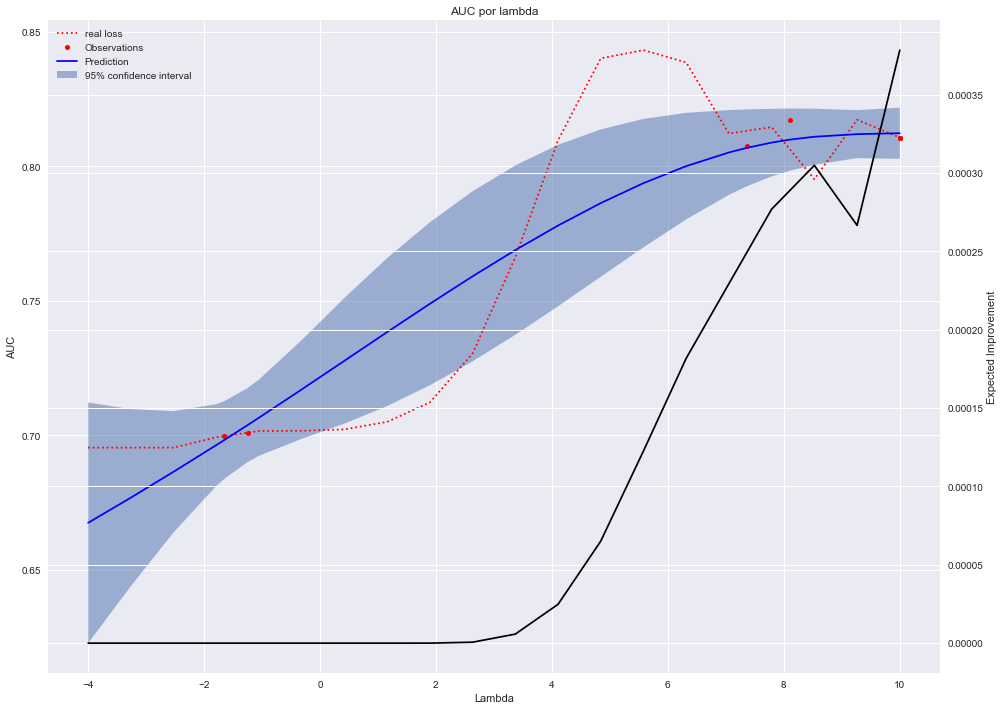

In [27]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 9546245326.22 2.5118864315095823e-07
el resultado fue 0.825823666635


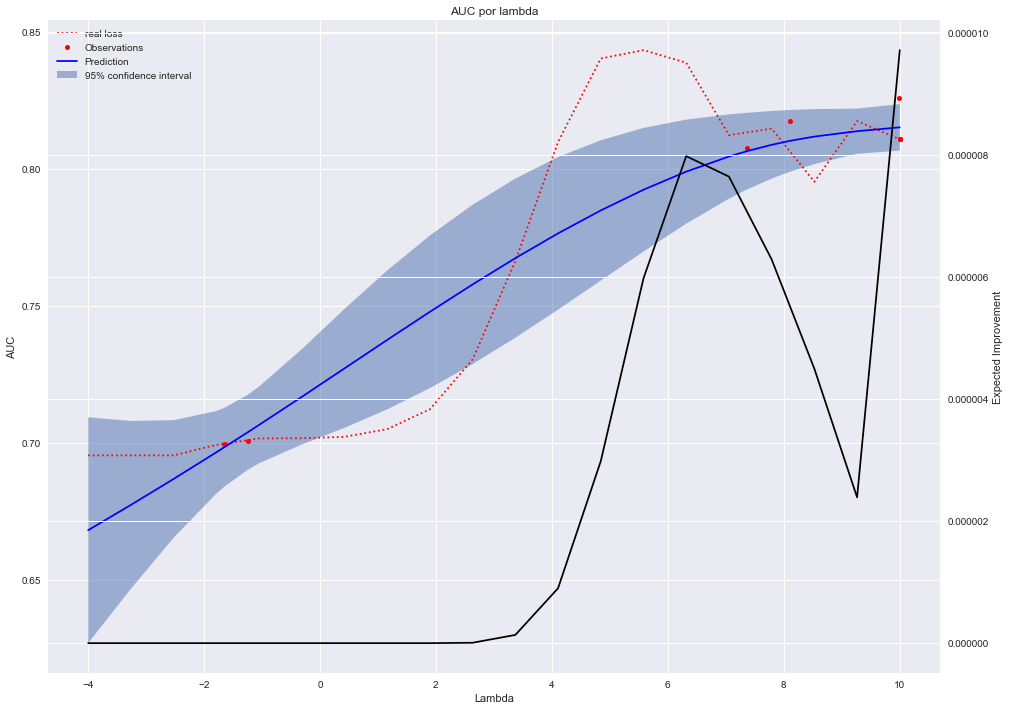

In [28]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 9543912774.33 2.5118864315095823e-07
el resultado fue 0.792653309047


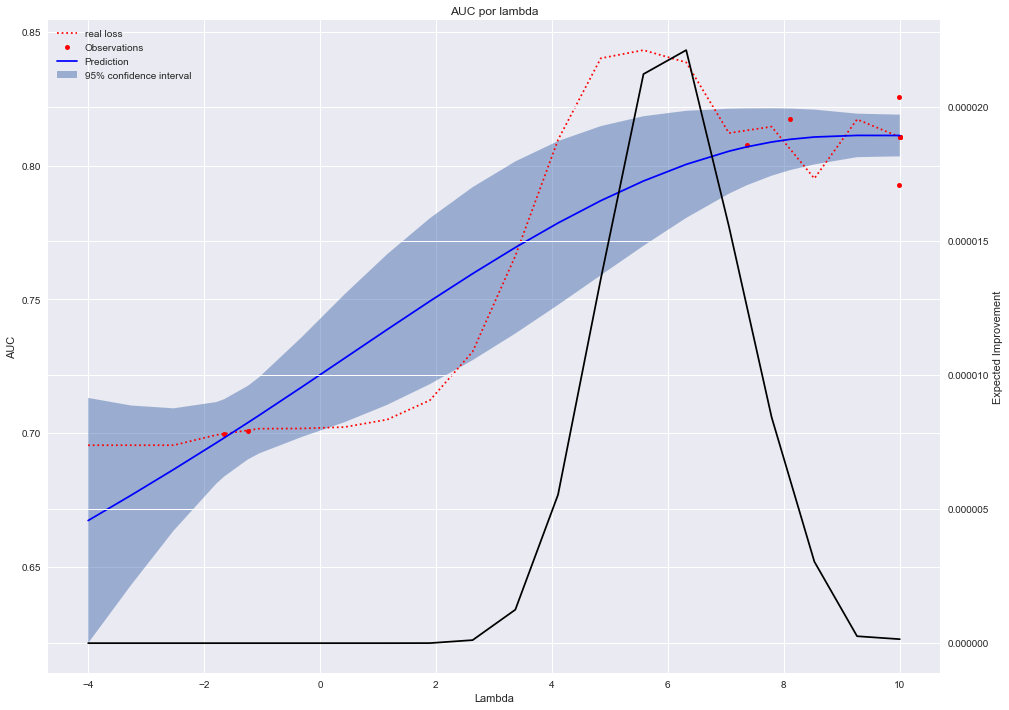

In [29]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 1340910.39561 2.5118864315095823e-07
el resultado fue 0.839261176621


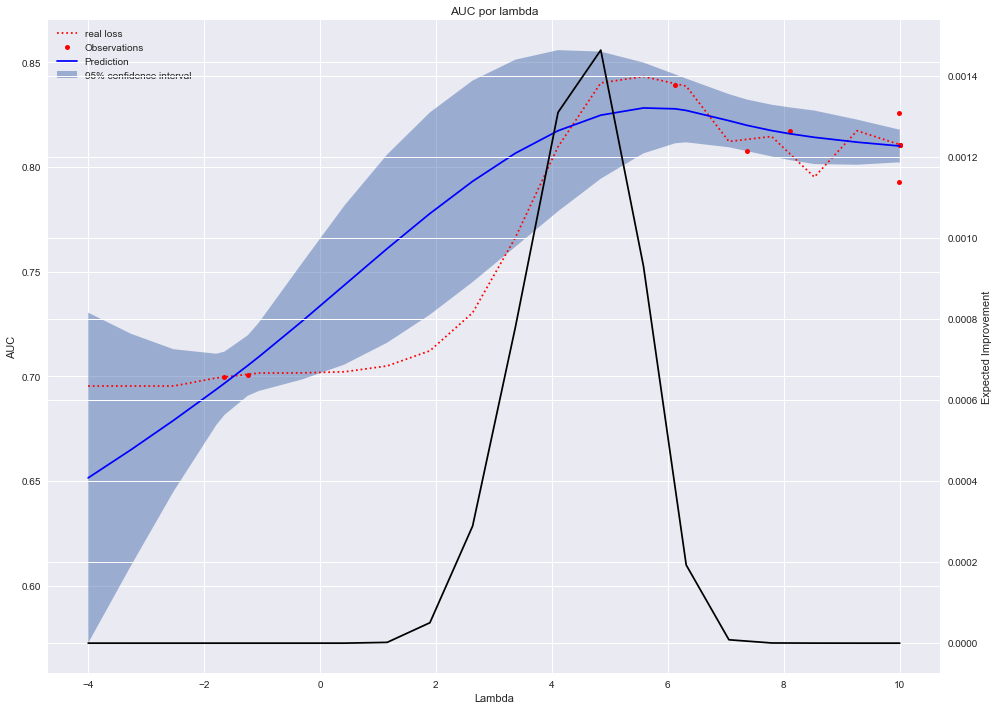

In [30]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 45691.320342 2.5118864315095823e-07
el resultado fue 0.831144345381


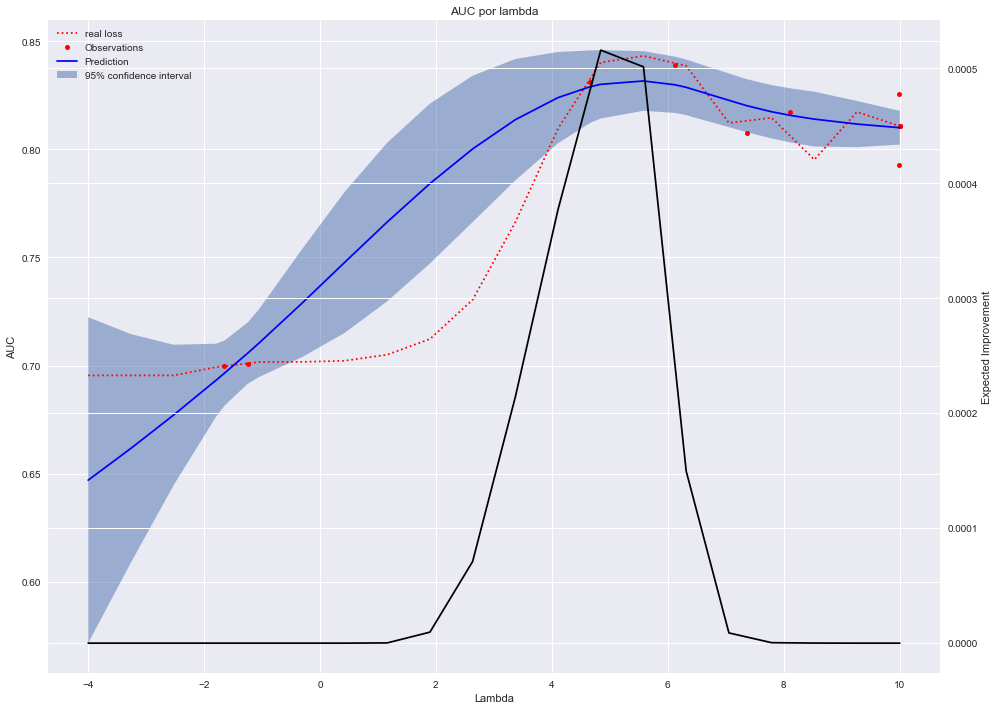

In [31]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 171662.024204 2.5118864315095823e-07
el resultado fue 0.840379637619


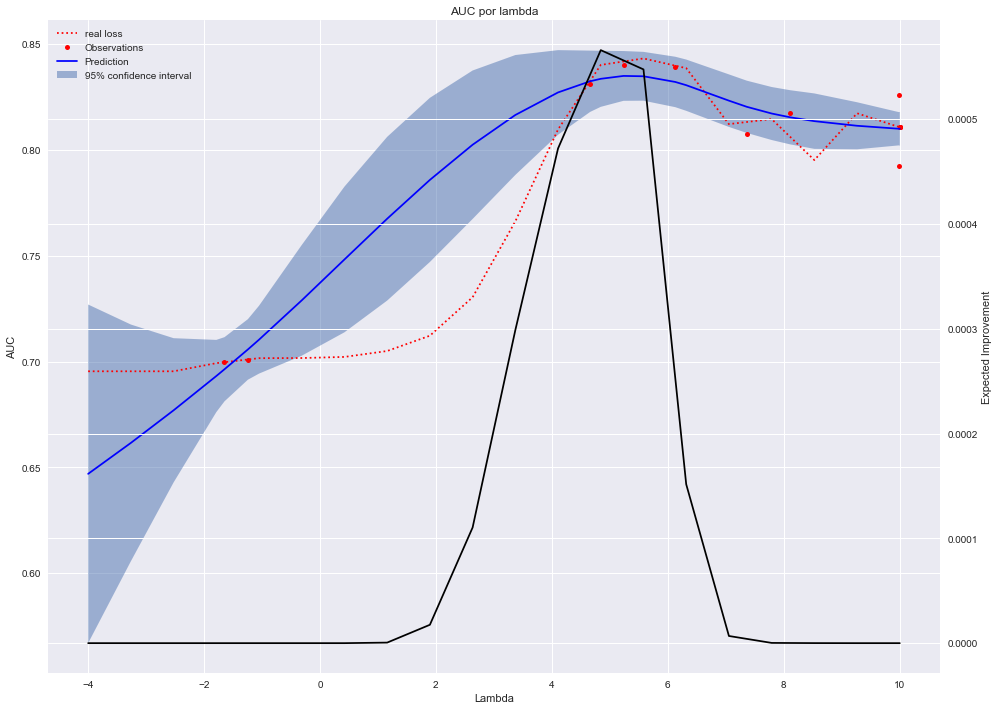

In [32]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 180115.32802 2.5118864315095823e-07
el resultado fue 0.840731153932


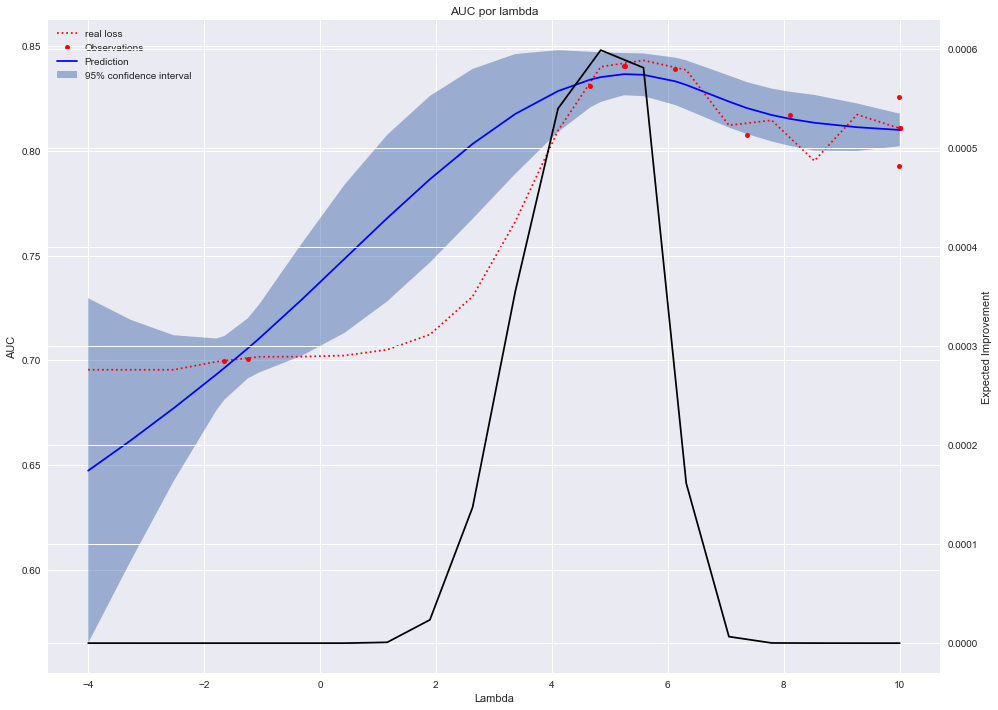

In [33]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 110862.314905 2.5118864315095823e-07
el resultado fue 0.838717924136


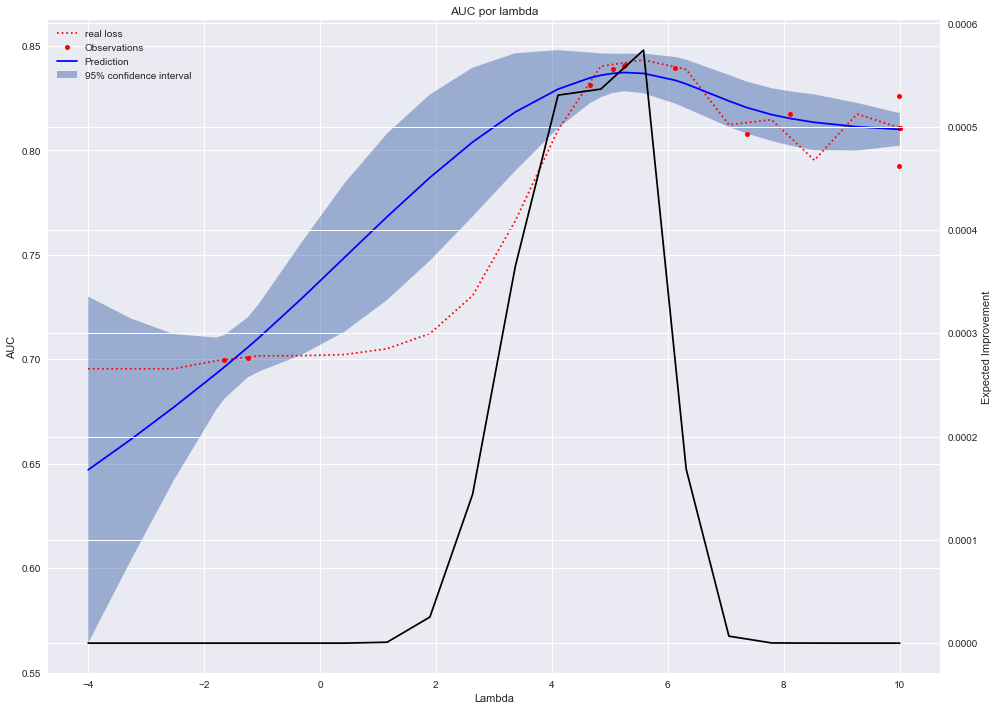

In [34]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 230321.898635 2.5118864315095823e-07
el resultado fue 0.841593966702


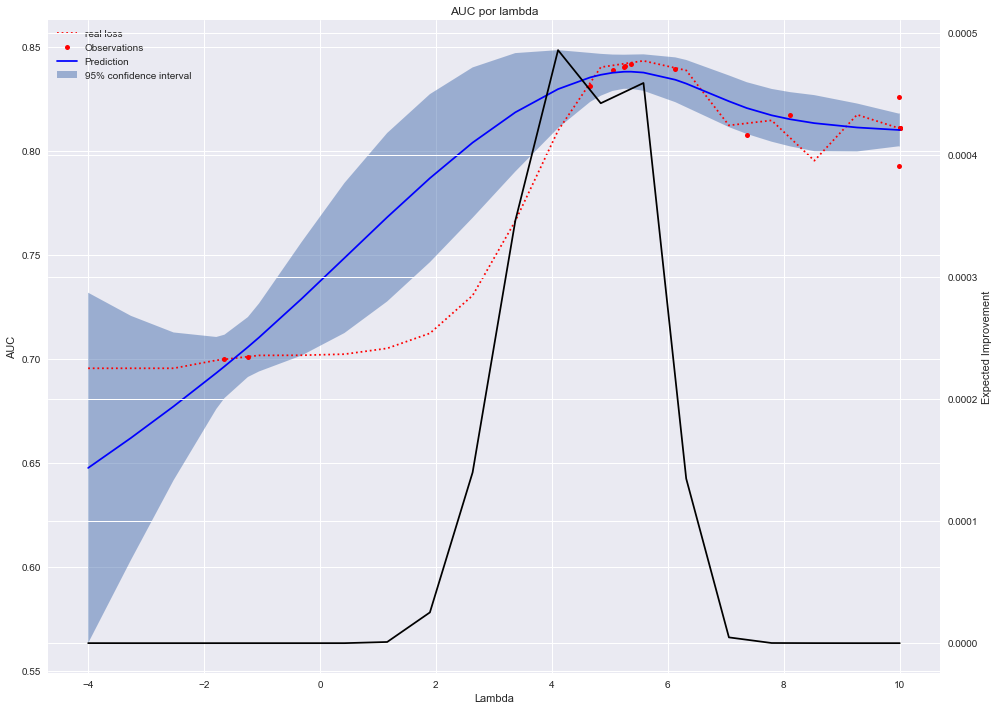

In [35]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 16052.4831745 2.5118864315095823e-07
el resultado fue 0.81652446234


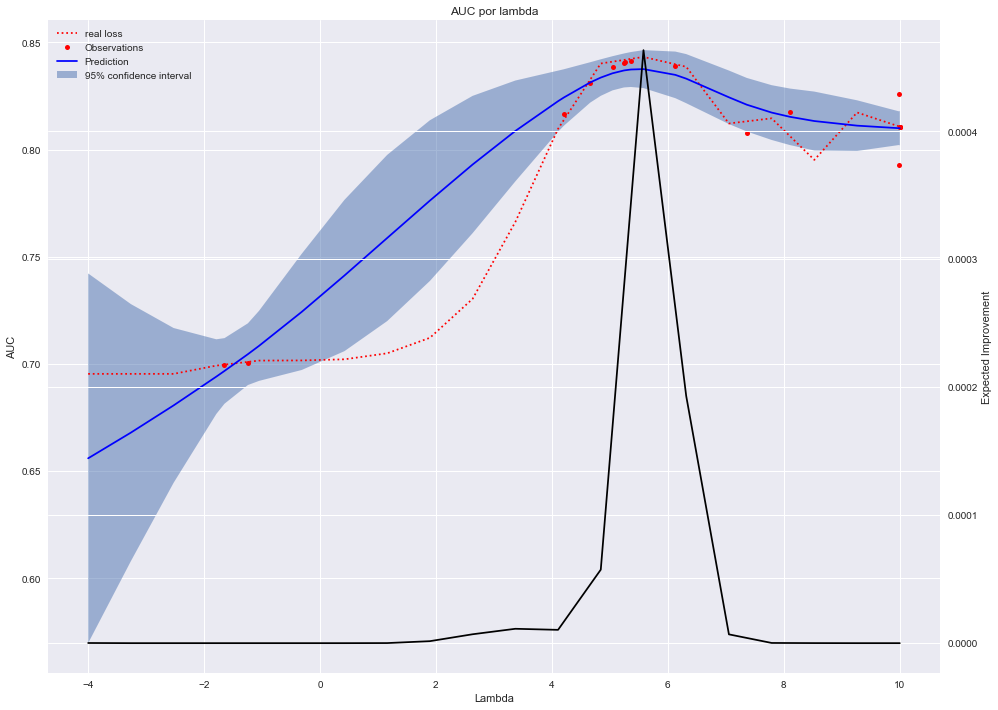

In [36]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 546977.531387 2.5118864315095823e-07
el resultado fue 0.844134470968


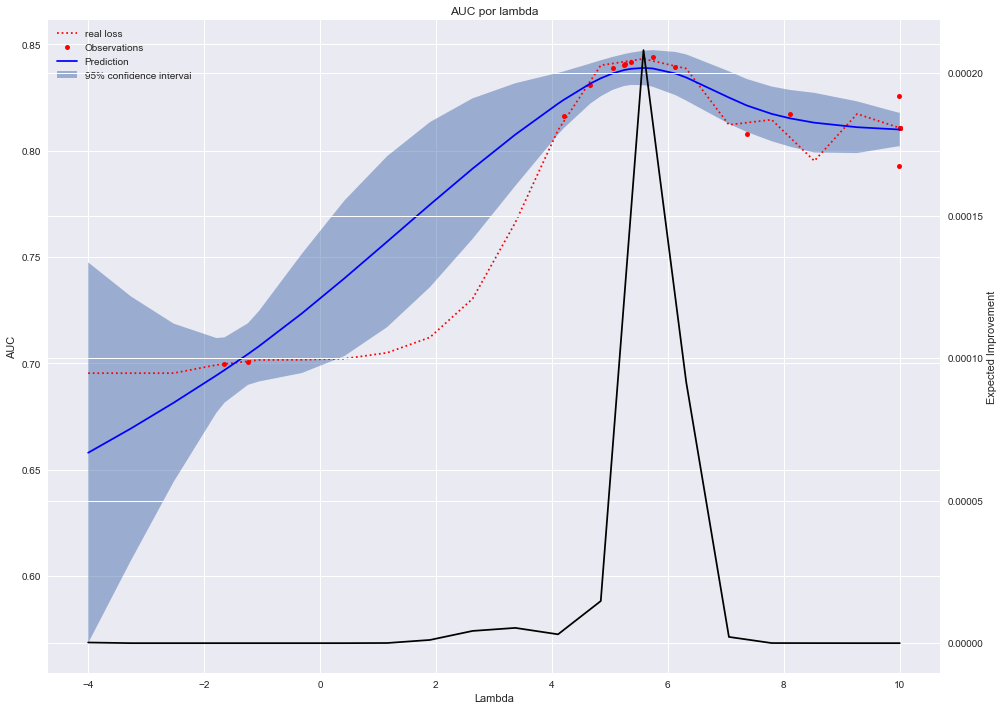

In [37]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 605082.000206 2.5118864315095823e-07
el resultado fue 0.843607196498


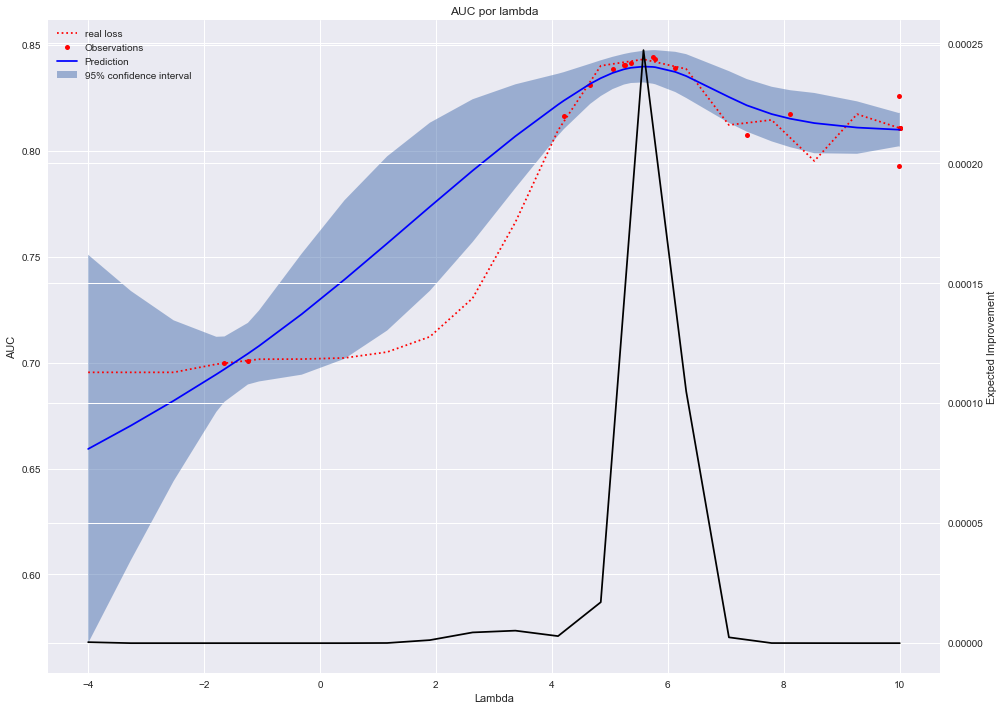

In [38]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 525751.919093 2.5118864315095823e-07
el resultado fue 0.842712427699


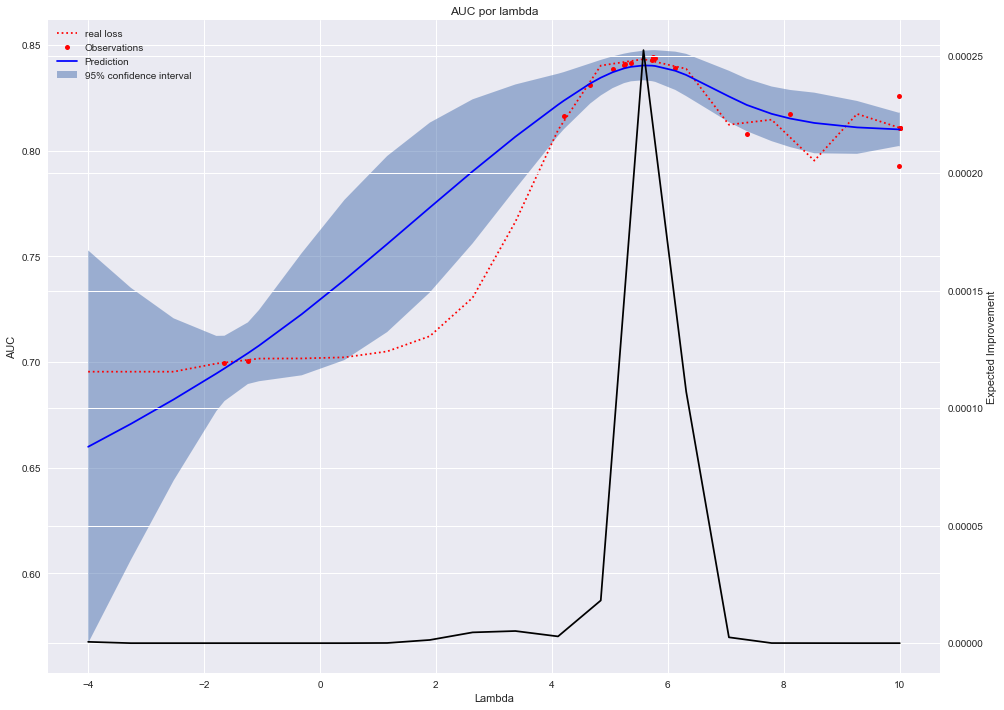

In [39]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

**********
haciendo 698819.788103 2.5118864315095823e-07
el resultado fue 0.843559262455


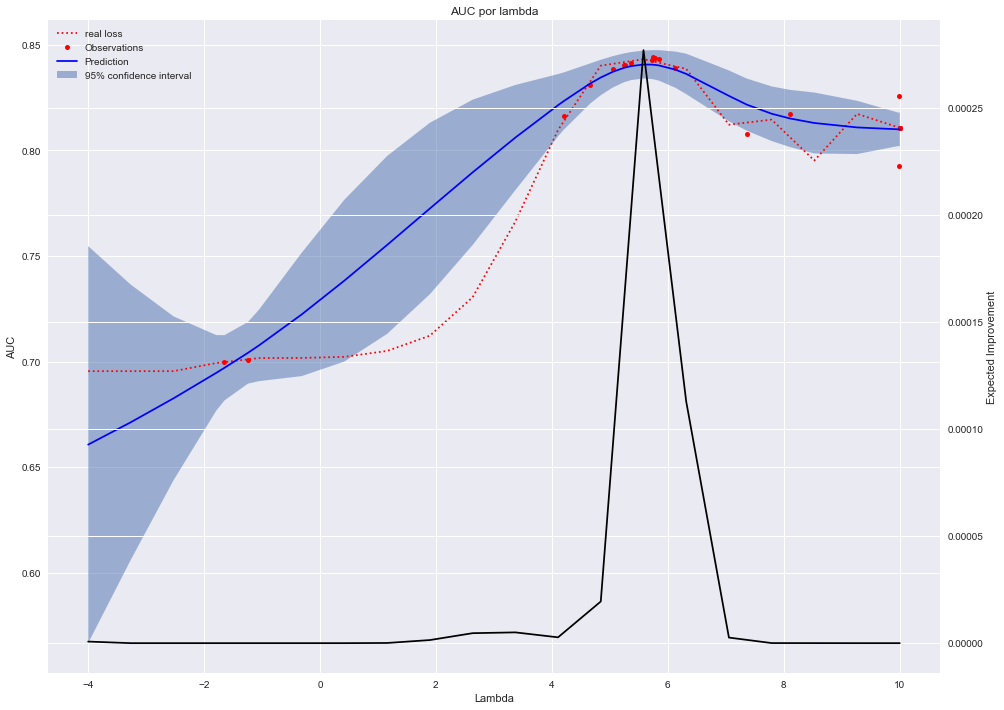

In [40]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [41]:
sample_loss(1, -6.6)

**********
haciendo 10 2.5118864315095823e-07
el resultado fue 0.705876713642


0.70587671364202864

In [42]:
sample_loss(1, -6.6)

**********
haciendo 10 2.5118864315095823e-07
el resultado fue 0.705876713642


0.70587671364202864

In [43]:
sample_loss(1, -6.6)

**********
haciendo 10 2.5118864315095823e-07
el resultado fue 0.705876713642


0.70587671364202864

In [44]:
[sample_loss(l * 1.0001, -6.6) for l in lambdas[-4:]]

**********
haciendo 61695378.3036 2.5118864315095823e-07
el resultado fue 0.823602722654
**********
haciendo 336642095.15 2.5118864315095823e-07
el resultado fue 0.840139967405
**********
haciendo 1836894486.15 2.5118864315095823e-07
el resultado fue 0.812721694948
**********
haciendo 10023052380.8 2.5118864315095823e-07
el resultado fue 0.800338733902


[0.82360272265362866,
 0.84013996740485097,
 0.81272169494775193,
 0.8003387339021506]

In [45]:
real_loss[-4:]

[0.81462307864378614,
 0.79524174735563868,
 0.81735531908094472,
 0.81074042118045575]